In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm

In [2]:
df = pd.read_csv("datos limpios.csv")
df

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos
0,F,29.0,7682701,025,008,7.53
1,F,31.0,2329670,632,635,5.85
2,M,36.0,7005978,367,439,12.05
3,F,28.0,7274376,322,028,27.73
4,M,23.0,5145545,297,202,33.58
...,...,...,...,...,...,...
10287,O,34.0,4917944,543,475,28.42
10288,M,29.0,8679474,319,378,11.70
10289,M,24.0,6433627,139,099,15.00
10290,M,35.0,6115828,040,548,19.13


In [3]:
#Parte 1 - Descripcion General del conjunto de Datos
df["Bici"].astype(str)
print("Cantidad de datos disponibles:" , df.shape[0])
print("-"*100)
print(df.dtypes)
print("-"*100)
print("Datos atipicos",df.isna().sum())
print("-"*100)

Cantidad de datos disponibles: 10292
----------------------------------------------------------------------------------------------------
Genero                        object
Edad                         float64
Bici                           int64
Estacion salida               object
Estacion llegada              object
Duracion viaje en minutos    float64
dtype: object
----------------------------------------------------------------------------------------------------
Datos atipicos Genero                       0
Edad                         0
Bici                         0
Estacion salida              0
Estacion llegada             0
Duracion viaje en minutos    0
dtype: int64
----------------------------------------------------------------------------------------------------


In [4]:
#Parte 2 - Exploracion de los datos
df["Bici"] = df["Bici"].astype(str) 
print("Estadisticas variables numericas\n",df.describe())

Estadisticas variables numericas
                Edad  Duracion viaje en minutos
count  10292.000000               10292.000000
mean      33.003206                  13.989256
std        8.471028                   8.843144
min       16.000000                   0.630000
25%       27.000000                   7.100000
50%       32.000000                  11.720000
75%       38.000000                  18.885000
max       57.000000                  39.380000


<Axes: >

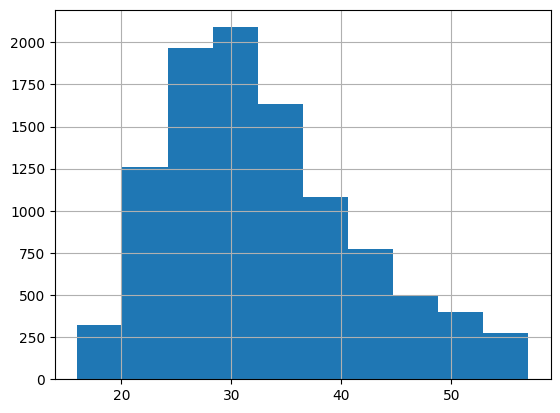

In [5]:
df["Edad"].hist()

<Axes: >

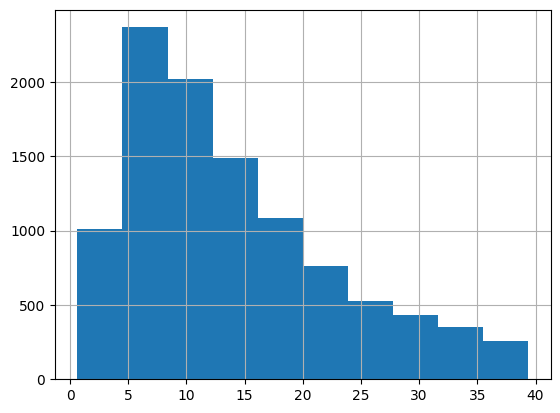

In [6]:
df["Duracion viaje en minutos"].hist()

(array([0, 1, 2]), [Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O')])

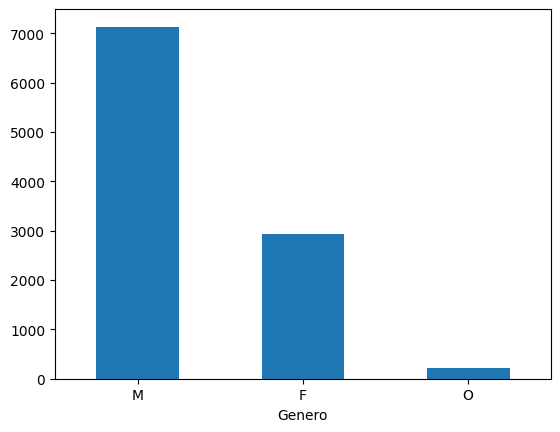

In [7]:
df["Genero"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

In [8]:
repetidas = df['Estacion salida'].value_counts()
repetidas = repetidas[repetidas > 1]

print("Cantidad de salidas por estacion:")
print(repetidas)

Cantidad de salidas por estacion:
Estacion salida
271-272    78
192-193    66
064        65
031        61
027        60
           ..
586         2
504         2
488         2
220         2
699         2
Name: count, Length: 672, dtype: int64


In [9]:
repetidas = df['Estacion llegada'].value_counts()
repetidas = repetidas[repetidas > 1]

print("Cantidad de llegadas por estacion")
print(repetidas)

Cantidad de llegadas por estacion
Estacion llegada
271-272    168
107-108     76
014         67
548         64
064         61
          ... 
515          2
422          2
438          2
681          2
203          2
Name: count, Length: 669, dtype: int64


In [10]:
viajes_redondos = df[df['Estacion salida'] == df['Estacion llegada']]
viajes_redondos

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos
64,M,47.0,7285257,477,477,2.75
106,O,33.0,7871973,142,142,13.70
132,M,22.0,8407108,566,566,28.27
203,M,33.0,2746576,277,277,36.97
205,M,53.0,2522605,115,115,14.95
...,...,...,...,...,...,...
10019,M,28.0,8255630,093,093,10.02
10130,M,51.0,3901626,498,498,24.05
10204,F,27.0,3021250,258,258,30.75
10241,M,30.0,6534085,321,321,2.12


In [11]:
edades = df['Edad'].value_counts()
edades = edades[edades > 1]

print("Edades en el DataFrame")
print(edades)

Edades en el DataFrame
Edad
28.0    554
30.0    553
31.0    537
27.0    523
32.0    506
29.0    493
26.0    474
24.0    437
33.0    428
34.0    424
35.0    415
25.0    414
36.0    364
23.0    339
37.0    306
38.0    282
22.0    271
39.0    267
41.0    235
40.0    226
21.0    210
42.0    192
43.0    184
20.0    162
44.0    160
45.0    153
46.0    129
47.0    117
49.0    115
19.0    112
48.0    103
51.0     98
50.0     97
52.0     88
53.0     75
55.0     60
54.0     59
56.0     47
18.0     38
57.0     36
17.0      6
16.0      3
Name: count, dtype: int64


In [12]:
df

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos
0,F,29.0,7682701,025,008,7.53
1,F,31.0,2329670,632,635,5.85
2,M,36.0,7005978,367,439,12.05
3,F,28.0,7274376,322,028,27.73
4,M,23.0,5145545,297,202,33.58
...,...,...,...,...,...,...
10287,O,34.0,4917944,543,475,28.42
10288,M,29.0,8679474,319,378,11.70
10289,M,24.0,6433627,139,099,15.00
10290,M,35.0,6115828,040,548,19.13


In [13]:
# Crear codificadores
le_salida = LabelEncoder()
le_llegada = LabelEncoder()

# Aplicar Label Encoding
df['Estacion salida cod'] = le_salida.fit_transform(df['Estacion salida'])
df['Estacion llegada cod'] = le_llegada.fit_transform(df['Estacion llegada'])

# Opcional: ver los primeros valores codificados
print(df[['Estacion salida', 'Estacion salida cod']])

      Estacion salida  Estacion salida cod
0                 025                   24
1                 632                  597
2                 367                  350
3                 322                  308
4                 297                  284
...               ...                  ...
10287             543                  508
10288             319                  305
10289             139                  136
10290             040                   39
10291             432                  399

[10292 rows x 2 columns]


In [14]:
le_genero = LabelEncoder()
df['Genero_cod'] = le_genero.fit_transform(df['Genero'])  # F, M, O → 0, 1, 2 

In [15]:
df['Rango de edad'] = pd.cut(df['Edad'],
                             bins=[17, 30, 50, df['Edad'].max()],
                             labels=['Joven', 'Adulto', 'Mayor'])

In [16]:
df['Viaje circular'] = df['Estacion salida'] == df['Estacion llegada']

In [17]:
df

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos,Estacion salida cod,Estacion llegada cod,Genero_cod,Rango de edad,Viaje circular
0,F,29.0,7682701,025,008,7.53,24,7,0,Joven,False
1,F,31.0,2329670,632,635,5.85,597,600,0,Adulto,False
2,M,36.0,7005978,367,439,12.05,350,405,1,Adulto,False
3,F,28.0,7274376,322,028,27.73,308,27,0,Joven,False
4,M,23.0,5145545,297,202,33.58,284,197,1,Joven,False
...,...,...,...,...,...,...,...,...,...,...,...
10287,O,34.0,4917944,543,475,28.42,508,440,2,Adulto,False
10288,M,29.0,8679474,319,378,11.70,305,359,1,Joven,False
10289,M,24.0,6433627,139,099,15.00,136,98,1,Joven,False
10290,M,35.0,6115828,040,548,19.13,39,513,1,Adulto,False


In [18]:
le_rango = LabelEncoder()
df['Rango de edad cod'] = le_rango.fit_transform(df['Rango de edad'])
df

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos,Estacion salida cod,Estacion llegada cod,Genero_cod,Rango de edad,Viaje circular,Rango de edad cod
0,F,29.0,7682701,025,008,7.53,24,7,0,Joven,False,1
1,F,31.0,2329670,632,635,5.85,597,600,0,Adulto,False,0
2,M,36.0,7005978,367,439,12.05,350,405,1,Adulto,False,0
3,F,28.0,7274376,322,028,27.73,308,27,0,Joven,False,1
4,M,23.0,5145545,297,202,33.58,284,197,1,Joven,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10287,O,34.0,4917944,543,475,28.42,508,440,2,Adulto,False,0
10288,M,29.0,8679474,319,378,11.70,305,359,1,Joven,False,1
10289,M,24.0,6433627,139,099,15.00,136,98,1,Joven,False,1
10290,M,35.0,6115828,040,548,19.13,39,513,1,Adulto,False,0


In [19]:
df['Viaje circular'] = df['Viaje circular'].astype(int)
df

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos,Estacion salida cod,Estacion llegada cod,Genero_cod,Rango de edad,Viaje circular,Rango de edad cod
0,F,29.0,7682701,025,008,7.53,24,7,0,Joven,0,1
1,F,31.0,2329670,632,635,5.85,597,600,0,Adulto,0,0
2,M,36.0,7005978,367,439,12.05,350,405,1,Adulto,0,0
3,F,28.0,7274376,322,028,27.73,308,27,0,Joven,0,1
4,M,23.0,5145545,297,202,33.58,284,197,1,Joven,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10287,O,34.0,4917944,543,475,28.42,508,440,2,Adulto,0,0
10288,M,29.0,8679474,319,378,11.70,305,359,1,Joven,0,1
10289,M,24.0,6433627,139,099,15.00,136,98,1,Joven,0,1
10290,M,35.0,6115828,040,548,19.13,39,513,1,Adulto,0,0


# Clustering de usuarios
Objetivo: Encontrar perfiles de usuarios con base en edad, duración de viaje, género, y estaciones más usadas.

In [20]:
#Creacion matriz de caracteristicas
X = df[['Edad', 'Duracion viaje en minutos', 'Genero_cod', 'Estacion salida cod', 'Estacion llegada cod']]

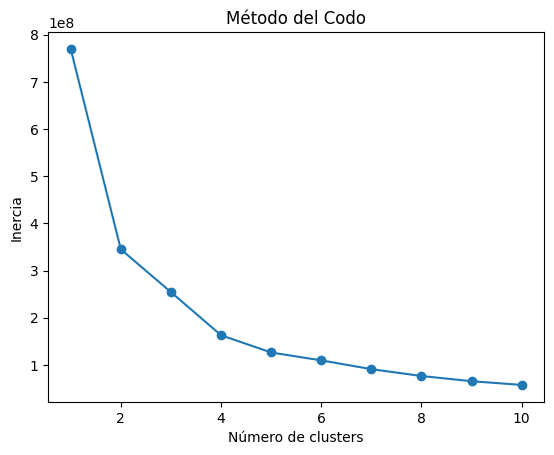

In [21]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [22]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'k={k}, Silhouette Score={score:.4f}')

k=2, Silhouette Score=0.4832
k=3, Silhouette Score=0.4081
k=4, Silhouette Score=0.4717
k=5, Silhouette Score=0.4692
k=6, Silhouette Score=0.3990
k=7, Silhouette Score=0.3992
k=8, Silhouette Score=0.4112
k=9, Silhouette Score=0.4303
k=10, Silhouette Score=0.4430


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

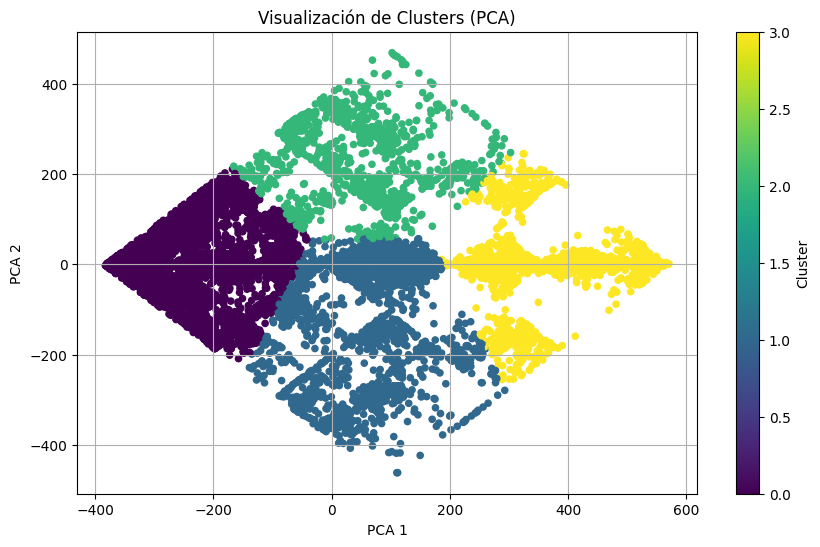

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=20)
plt.title('Visualización de Clusters (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

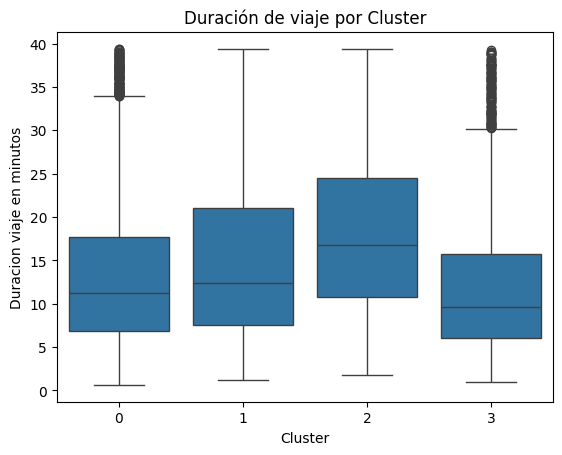

In [25]:
cluster_summary = df.groupby('Cluster')[['Edad', 'Duracion viaje en minutos', 'Genero_cod', 'Estacion salida cod', 'Estacion llegada cod']].mean()
# Distribución de duración del viaje por cluster
sns.boxplot(data=df, x='Cluster', y='Duracion viaje en minutos')
plt.title('Duración de viaje por Cluster')
plt.show()

In [26]:
for i in df['Cluster'].unique():
    cluster = df[df['Cluster'] == i]
    print(f"\nCluster {i}")
    print(f"Edad promedio: {cluster['Edad'].mean():.1f}")
    print(f"Duración promedio: {cluster['Duracion viaje en minutos'].mean():.1f} minutos")
    print(f"Género más común: {le_genero.inverse_transform([cluster['Genero_cod'].mode()[0]])[0]}")


Cluster 0
Edad promedio: 33.2
Duración promedio: 13.4 minutos
Género más común: M

Cluster 3
Edad promedio: 32.6
Duración promedio: 12.0 minutos
Género más común: M

Cluster 1
Edad promedio: 33.1
Duración promedio: 14.8 minutos
Género más común: M

Cluster 2
Edad promedio: 32.9
Duración promedio: 18.1 minutos
Género más común: M


# Analisis de Redes de Movilidad

In [27]:
df = df[df['Estacion salida cod'].notnull() & df['Estacion llegada cod'].notnull()]
df['Estacion salida cod'] = df['Estacion salida cod'].astype(int)
df['Estacion llegada cod'] = df['Estacion llegada cod'].astype(int)

In [28]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Contar los trayectos entre estaciones
edge_weights = df.groupby(['Estacion salida cod', 'Estacion llegada cod']).size()

# Agregar nodos y aristas al grafo
for (source, target), weight in edge_weights.items():
    G.add_edge(source, target, weight=weight)

In [29]:
# Grado de entrada (estaciones más utilizadas como destino)
in_degree = G.in_degree(weight='weight')

# Grado de salida (estaciones más utilizadas como origen)
out_degree = G.out_degree(weight='weight')

In [30]:
betweenness = nx.betweenness_centrality(G, weight='weight')

In [31]:
# Convertimos el grafo a no dirigido para Louvain
G_undirected = G.to_undirected()

# Detectar comunidades
partition = community_louvain.best_partition(G_undirected)

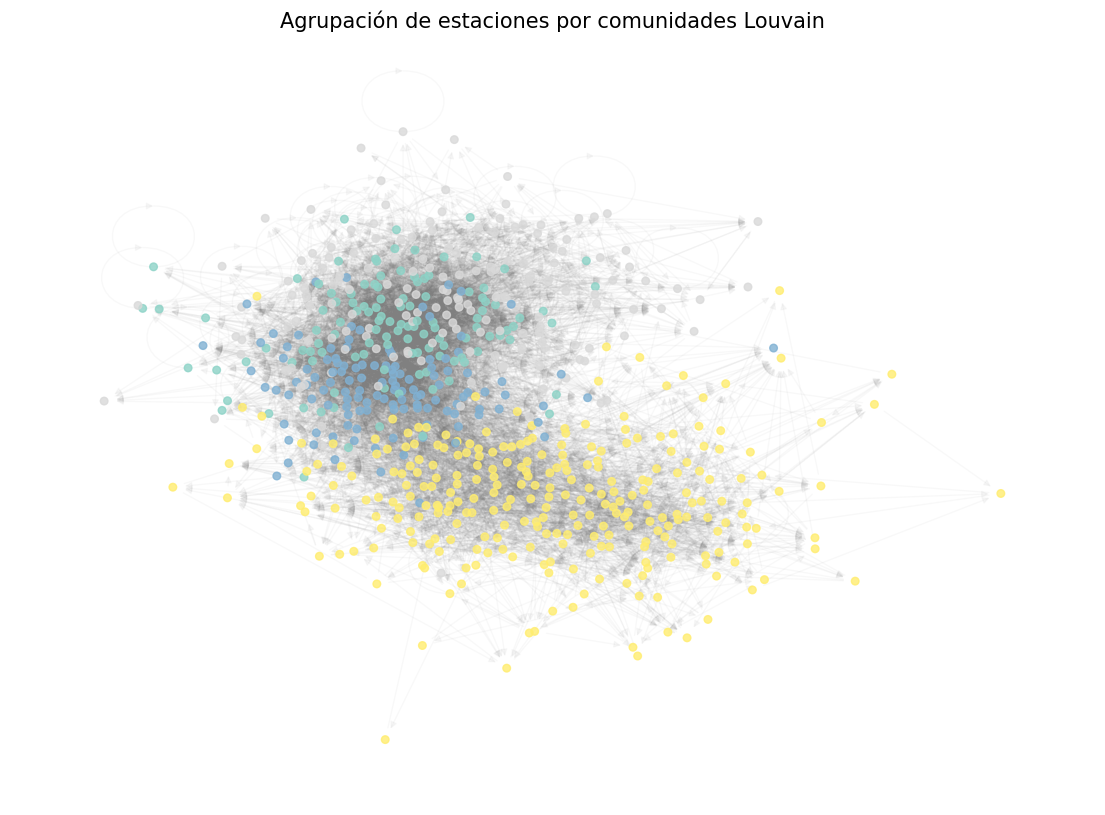

In [32]:
# Layout fijo para mantener agrupamiento visible
pos = nx.spring_layout(G, k=0.25, seed=42)

# Extraer color por comunidad
node_color = [partition.get(node, 0) for node in G.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_color, cmap=cm.Set3, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.05, edge_color='gray')
plt.title("Agrupación de estaciones por comunidades Louvain", fontsize=15)
plt.axis('off')
plt.show()

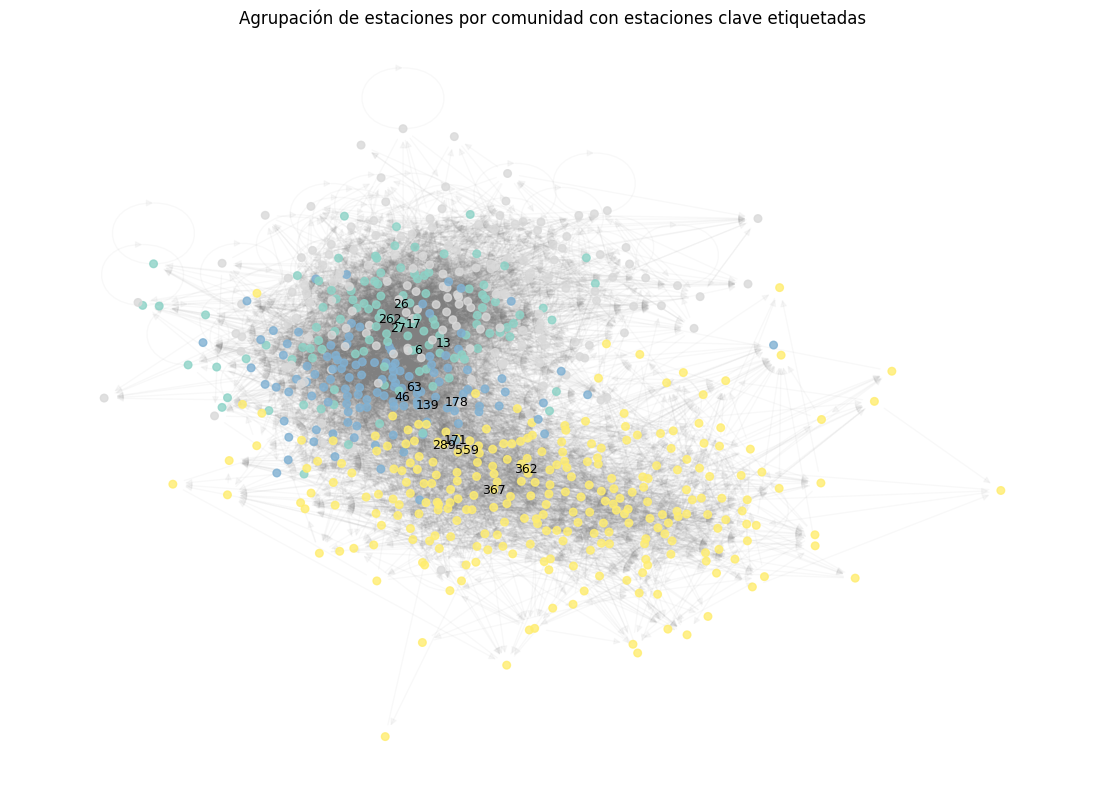

In [33]:
top_labels = dict(sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:15])
top_nodes = list(top_labels.keys())

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_color, cmap=cm.Set3, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.05, edge_color='gray')

# Agregar etiquetas solo a estaciones clave
nx.draw_networkx_labels(G, pos, labels={k: str(k) for k in top_nodes}, font_size=9, font_color='black')

plt.title("Agrupación de estaciones por comunidad con estaciones clave etiquetadas")
plt.axis('off')
plt.show()

In [34]:
# Crear DataFrame de métricas
df_metrica = pd.DataFrame({
    "Estacion": list(G.nodes()),
    "Grado_entrada": [G.in_degree(n, weight='weight') for n in G.nodes()],
    "Grado_salida": [G.out_degree(n, weight='weight') for n in G.nodes()],
    "Betweenness": [betweenness.get(n, 0.0) for n in G.nodes()],
    "Comunidad": [partition.get(n, -1) for n in G.nodes()]
})

# Ordenar por importancia (puedes elegir la que más te sirva)
top_por_betweenness = df_metrica.sort_values(by="Betweenness", ascending=False).head(15)
top_por_grado = df_metrica.sort_values(by="Grado_entrada", ascending=False).head(15)

In [35]:
df_metrica

,Estacion,Grado_entrada,Grado_salida,Betweenness,Comunidad
0,0,39,40,0.011599,0
1,1,21,12,0.003842,0
2,3,27,24,0.005773,0
3,5,28,30,0.005131,0
4,10,18,20,0.001712,0
...,...,...,...,...,...
672,645,2,3,0.000424,3
673,629,1,3,0.000033,3
674,650,4,18,0.002249,3
675,641,2,4,0.000316,3


In [36]:
top_por_betweenness

,Estacion,Grado_entrada,Grado_salida,Betweenness,Comunidad
29,262,168,78,0.035895,0
6,13,67,58,0.024108,0
77,63,61,65,0.020465,1
308,367,26,29,0.017855,3
198,139,37,39,0.016368,1
50,27,59,43,0.014715,0
8,26,59,60,0.013713,0
274,46,30,45,0.013500,1
259,178,34,43,0.013476,1
370,171,28,27,0.013316,1


In [37]:
top_por_grado

,Estacion,Grado_entrada,Grado_salida,Betweenness,Comunidad
29,262,168,78,0.035895,0
81,105,76,59,0.011504,0
6,13,67,58,0.024108,0
162,513,64,60,0.009662,2
77,63,61,65,0.020465,1
50,27,59,43,0.014715,0
8,26,59,60,0.013713,0
9,40,54,33,0.010180,0
135,17,52,52,0.012824,0
118,155,51,51,0.011221,1


In [38]:
top_por_betweenness.to_csv("top_estaciones_betweenness.csv", index=False)
top_por_grado.to_csv("top_estaciones_grado.csv", index=False)